<a href="https://colab.research.google.com/github/pinilDissanayaka/Emotion-Text-Detection-using-BERT-LSTM/blob/main/Notebook/notebook_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install tensorflow_text

In [4]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import re
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from tensorflow_hub import KerasLayer
import tensorflow_text as text
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model
from tensorflow.keras.layers import LSTM, Bidirectional, Dense, Dropout, Input
from tensorflow.keras.callbacks import EarlyStopping
import warnings
warnings.filterwarnings(action= 'ignore')

In [6]:
df = pd.read_csv('/content/Emotion_classify_Data.csv')

In [7]:
df.head()

,Comment,Emotion
0,i seriously hate one subject to death but now ...,fear
1,im so full of life i feel appalled,anger
2,i sit here to write i start to dig out my feel...,fear
3,ive been really angry with r and i feel like a...,joy
4,i feel suspicious if there is no one outside l...,fear


In [8]:
df.tail()

,Comment,Emotion
5932,i begun to feel distressed for you,fear
5933,i left feeling annoyed and angry thinking that...,anger
5934,i were to ever get married i d have everything...,joy
5935,i feel reluctant in applying there because i w...,fear
5936,i just wanted to apologize to you because i fe...,anger


In [9]:
df.shape

(5937, 2)

The dataset contain 5937 rows and 2 columns

In [10]:
df.columns

Index(['Comment', 'Emotion'], dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5937 entries, 0 to 5936
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Comment  5937 non-null   object
 1   Emotion  5937 non-null   object
dtypes: object(2)
memory usage: 92.9+ KB


In [12]:
df.duplicated().sum()

0

In [13]:
df.isnull().sum()

Comment    0
Emotion    0
dtype: int64

In [14]:
values  = df['Emotion'].value_counts(normalize= True) * 100
labels = values.index

values

anger    33.687047
joy      33.687047
fear     32.625905
Name: Emotion, dtype: float64

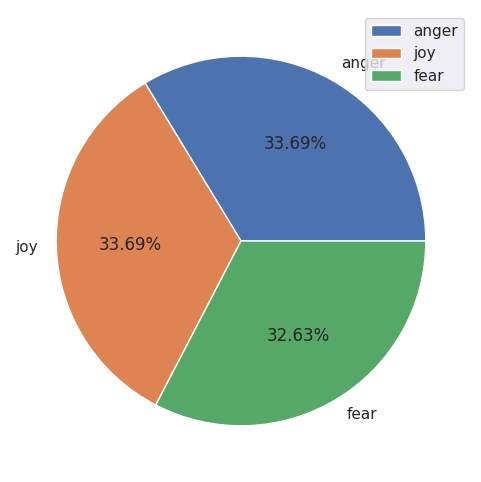

In [15]:
sns.set()
plt.figure(figsize = (6, 6))
plt.pie(x = values, labels= labels, autopct= '%1.2f%%')
plt.legend(labels)
plt.show()

In [16]:
le = LabelEncoder()
le.fit(df['Emotion'])

LabelEncoder()

In [17]:
df['Encoded_Emotion'] = le.transform(df['Emotion'])

In [18]:
df['Encoded_Emotion'].value_counts(normalize = True) * 100

0    33.687047
2    33.687047
1    32.625905
Name: Encoded_Emotion, dtype: float64

In [19]:
out_classes = list(le.inverse_transform([0, 1, 2]))
out_size = len(out_classes)
for i in range(out_size):
    print(f"{out_classes[i]} ---> {i}")

anger ---> 0
fear ---> 1
joy ---> 2


In [20]:
X = df['Comment'].values.flatten()
y = to_categorical(df['Encoded_Emotion'])

In [21]:
X

array(['i seriously hate one subject to death but now i feel reluctant to drop it',
       'im so full of life i feel appalled',
       'i sit here to write i start to dig out my feelings and i think that i am afraid to accept the possibility that he might not make it',
       ...,
       'i were to ever get married i d have everything ready to offer to him because i ve got it together and when i do go out to clubs even the perfect good looking guys feel intimated after talking to me about my clever self',
       'i feel reluctant in applying there because i want to be able to find a company where i know at least one person',
       'i just wanted to apologize to you because i feel like a heartless bitch'],
      dtype=object)

In [22]:
y

array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       ...,
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.]], dtype=float32)

In [23]:
wl = WordNetLemmatizer()
corpus = []

for i in range(len(list(X))):
    text = re.sub('[^a-zA-Z0-9]', ' ', X[i])
    text = text.lower()
    text = text.split()

    text = [wl.lemmatize(word) for word in text if not word in stopwords.words('english')]
    text = ' '.join(text)
    corpus.append(text)

    print(f'status : {i +1} / {len(X)}')

Streaming output truncated to the last 5000 lines.
status : 938 / 5937
status : 939 / 5937
status : 940 / 5937
status : 941 / 5937
status : 942 / 5937
status : 943 / 5937
status : 944 / 5937
status : 945 / 5937
status : 946 / 5937
status : 947 / 5937
status : 948 / 5937
status : 949 / 5937
status : 950 / 5937
status : 951 / 5937
status : 952 / 5937
status : 953 / 5937
status : 954 / 5937
status : 955 / 5937
status : 956 / 5937
status : 957 / 5937
status : 958 / 5937
status : 959 / 5937
status : 960 / 5937
status : 961 / 5937
status : 962 / 5937
status : 963 / 5937
status : 964 / 5937
status : 965 / 5937
status : 966 / 5937
status : 967 / 5937
status : 968 / 5937
status : 969 / 5937
status : 970 / 5937
status : 971 / 5937
status : 972 / 5937
status : 973 / 5937
status : 974 / 5937
status : 975 / 5937
status : 976 / 5937
status : 977 / 5937
status : 978 / 5937
status : 979 / 5937
status : 980 / 5937
status : 981 / 5937
status : 982 / 5937
status : 983 / 5937
status : 984 / 5937
status : 

In [25]:
print(f"Before preprocessing : {X[0]}")
print(f"After preprocessing : {corpus[0]}")

Before preprocessing : i seriously hate one subject to death but now i feel reluctant to drop it
After preprocessing : seriously hate one subject death feel reluctant drop


In [26]:
print(f"Before preprocessing : {X[100]}")
print(f"After preprocessing : {corpus[100]}")

Before preprocessing : i feel so bitchy and mean and terrible
After preprocessing : feel bitchy mean terrible


In [27]:
X = np.array(corpus)
y = np.array(y)

In [28]:
X

array(['seriously hate one subject death feel reluctant drop',
       'im full life feel appalled',
       'sit write start dig feeling think afraid accept possibility might make',
       ...,
       'ever get married everything ready offer got together go club even perfect good looking guy feel intimated talking clever self',
       'feel reluctant applying want able find company know least one person',
       'wanted apologize feel like heartless bitch'], dtype='<U222')

In [29]:
y

array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       ...,
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.]], dtype=float32)

In [30]:
X_train, X_test, y_train, y_test =  train_test_split(X, y, train_size= 0.75, random_state= 5, shuffle= True)

In [31]:
preprocessor_url = "https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3"
encorder_url = "https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4"

In [32]:
preprocessor_layer = KerasLayer(preprocessor_url)
encorder_layer = KerasLayer(encorder_url)

In [33]:
def bert(text):
  preprocessed_text = preprocessor_layer(text)
  encordered_text = encorder_layer(preprocessed_text)
  return encordered_text

In [ ]:
X_train_em = bert(X_train)